# NCAA ML Competition - Women's 2018

## Notes

Notes about what's in the data files: https://www.kaggle.com/c/womens-machine-learning-competition-2018/data

Starter Kernel might help: https://www.kaggle.com/juliaelliott/basic-starter-kernel-ncaa-women-s-dataset

In [3]:
# This tells matplotlib not to try opening a new window for each plot.
%matplotlib inline

# General libraries.
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# SK-learn libraries for learning.
from sklearn.pipeline import Pipeline
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression
from sklearn.naive_bayes import BernoulliNB
from sklearn.naive_bayes import MultinomialNB
from sklearn.grid_search import GridSearchCV

# SK-learn libraries for evaluation.
from sklearn.metrics import confusion_matrix
from sklearn import metrics
from sklearn.metrics import classification_report

/anaconda2/lib/python2.7/site-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)
/anaconda2/lib/python2.7/site-packages/sklearn/grid_search.py:42: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. This module will be removed in 0.20.
  DeprecationWarning)


In [4]:
df = pd.read_csv('WStage2DataFiles/WRegularSeasonDetailedResults.csv') ## regular season exploration


### Explore the impact of relative team performance on game outcome

0.61802937970724703

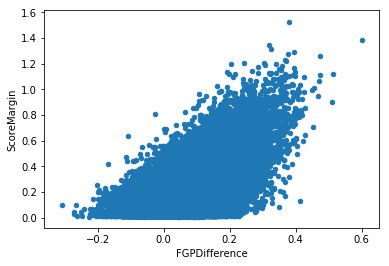

In [5]:
## Rescale field goal performance into a percentage
## Calculate field goal percentage difference between the winning and losing teams and explore potential relationship
## with margin of victory (difference in score for a game)

from scipy.stats.stats import pearsonr

df['WFGP'] = df.WFGM / df.WFGA ## Field goal percentage for the winning team
df['LFGP'] = df.LFGM / df.LFGA ## Field goal percentage for the losing team
df['FGPDifference'] = (df.WFGP - df.LFGP) ## Difference in field goal percentage
df['ScoreMargin'] = 2 * (df.WScore - df.LScore) / (df.WScore + df.LScore) ## rescaled score margin
df.plot.scatter(x='FGPDifference', y='ScoreMargin')
pearsonr(df.FGPDifference, df.ScoreMargin)[0] ## Linear correlation measure

A higher field goal percentage difference is strongly associated with win margin.

0.29857728047958765

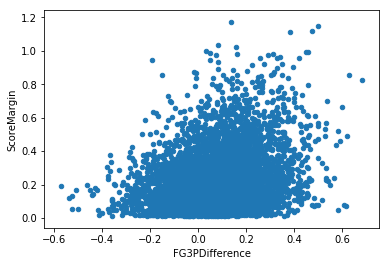

In [24]:
## Repeat the above for 3 point field goal performance

df['WFG3P'] = df.WFGM3 / df.WFGA3 ## 3 point field goal percentage for the winning team
df['LFG3P'] = df.LFGM3 / df.LFGA3 ## 3 point field goal percentage for the losing team
df['FG3PDifference'] = (df.WFG3P - df.LFG3P) ## Difference in 3 point field goal percentage
df.plot.scatter(x='FG3PDifference', y='ScoreMargin')
pearsonr(df.FG3PDifference, df.ScoreMargin)[0] ## Linear correlation measure

The correlation between 3 point field goal percentage difference and win margin is not too strong. This indicates that teams that win a game with a larger margin tend to have only slightly better 3 point field goal percentage than the losing team in that game.

Free throw performance by itself is not strongly associated with win margin. This is not surprising. Some teams have a lower 2 point field goal rate but they draw a larger number of persoanl fouls from the opposing team. This can lead to a difference in tactics of how the teams accumulate 2 point goals without impacting their overall success in scoring  2 point goals.

0.38124318122090894

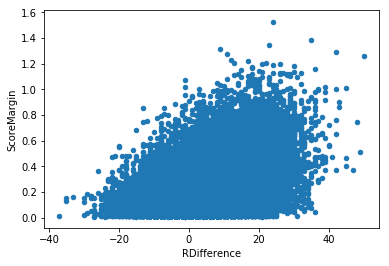

In [7]:
## Repeat the above for number of rebounds

df['WR'] = df.WOR + df.WDR ## total rebounds as the sum of offensive and defensive rebounds
df['LR'] = df.LOR + df.LDR ## total rebounds as the sum of offensive and defensive rebounds
df['RDifference'] = (df.WR - df.LR) ## Difference in free throw percentage
df.plot.scatter(x='RDifference', y='ScoreMargin')
pearsonr(df.RDifference, df.ScoreMargin)[0] ## Linear correlation measure

Relative performance in offensive and defensive rebounds has a significant correlation with win margin

0.57557310251248361

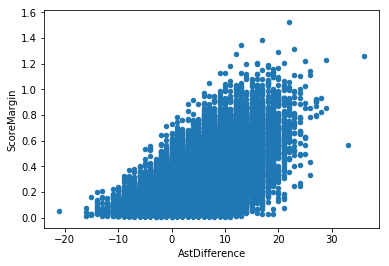

In [8]:
## Explore if the difference in assists between winning and losing teams correlate with win margin

df['AstDifference'] = (df.WAst - df.LAst) ## Difference in assists between winner and loser of a game
df.plot.scatter(x='AstDifference', y='ScoreMargin')
pearsonr(df.AstDifference, df.ScoreMargin)[0] ## Linear correlation measure

Relative performance in assists has a strong correlation with win margin. Assists indicate a more orchestrated style of play and may be an indicator how a team collaborates and creates opportunities on the field.

0.29996139359742868

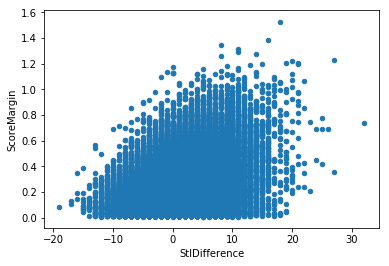

In [9]:
## Explore if the difference in steals between winning and losing teams correlate with win margin

df['StlDifference'] = (df.WStl - df.LStl) ## Difference in steals between winner and loser of a game
df.plot.scatter(x='StlDifference', y='ScoreMargin')
pearsonr(df.StlDifference, df.ScoreMargin)[0] ## Linear correlation measure

Relative performance in steals has a modest correlation with win margin.

0.392064011803
0.297041940477


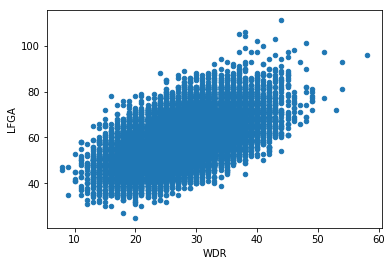

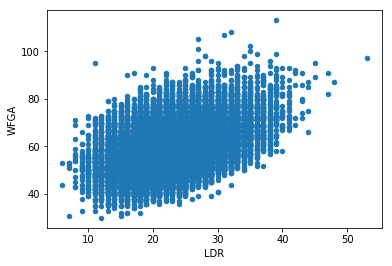

In [10]:
## Explore correlation of field goals attempted by a team and the opposing teams' number of rebounds 

df['WR'] = df.WOR + df.WDR ## total rebounds as the sum of offensive and defensive rebounds
df['LR'] = df.LOR + df.LDR ## total rebounds as the sum of offensive and defensive rebounds
df.plot.scatter(x='WDR', y='LFGA')
print pearsonr(df.WR, df.LFGA)[0] ## Correlation between a team's field goals attempts and opposing team's rebound counts
df.plot.scatter(x='LDR', y='WFGA')
print pearsonr(df.LR, df.WFGA)[0] ## Correlation between a team's field goals attempts and opposing team's rebound counts

The winning team's rebound performance is strongly associated with the number of field goal attempts. The correlation is less strong for the losing team.

### Explore how performance on different measures has impacted game outcomes over time 

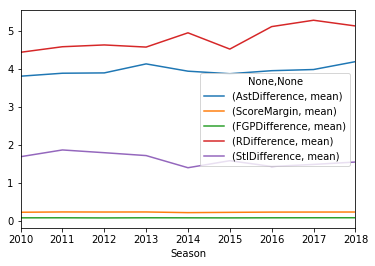

In [11]:
df2 = df[['Season', 'FGPDifference', 'RDifference', 'AstDifference', 'StlDifference', 'ScoreMargin']].groupby(['Season'], as_index=False).agg({'FGPDifference':['mean'], 'RDifference':['mean'], 'AstDifference':['mean'], 'StlDifference':['mean'], 'ScoreMargin':['mean']})
df2.plot(x='Season')

Over the years, the importance of field goal performance in determining game outcomes has remained constant whereas the importance of assists and rebounds in determining game outcomes has been rising.

### Explore the extent to which the performance of a team during a regular season correlates with its game outcomes during the season

In [12]:
df = df[df['Season']==2016] ## Slice out 2016 season 

In [13]:
## Isolate field goal percentage by team regardless of who won a game
df_WTeamFGP_game = df[['WTeamID','WFGP']].rename(columns = {'WTeamID':'TeamID', 'WFGP':'FGP'})
df_LTeamFGP_game = df[['LTeamID','LFGP']].rename(columns = {'LTeamID':'TeamID', 'LFGP':'FGP'})
df_TeamFGP_game = pd.concat([df_WTeamFGP_game, df_LTeamFGP_game])
df_TeamFGP = df_TeamFGP_game.groupby('TeamID', as_index=False).agg({'FGP':['mean']})

## Normalize field goal by demeaning and standardizing
df_TeamFGP['df_FGP_norm'] = ((df_TeamFGP.FGP - df_TeamFGP.FGP.mean())/df_TeamFGP.FGP.std())

## Bin normalized field goal percentage
df_TeamFGP['FGPbin'] = pd.cut(df_TeamFGP.df_FGP_norm, 10, labels=False)
df_TeamFGP.head()

,TeamID,FGP,df_FGP_norm,FGPbin
,,mean,,
0,3101,0.427180,0.915327,5
1,3102,0.324069,-2.250454,0
2,3103,0.401761,0.134898,4
3,3104,0.389823,-0.231646,3
4,3105,0.382285,-0.463060,3


In [14]:
## Isolate number of assists by team regardless of who won a game
df_WTeamAst_game = df[['WTeamID','WAst']].rename(columns = {'WTeamID':'TeamID', 'WAst':'Ast'})
df_LTeamAst_game = df[['LTeamID','LAst']].rename(columns = {'LTeamID':'TeamID', 'LAst':'Ast'})
df_TeamAst_game = pd.concat([df_WTeamAst_game, df_LTeamAst_game])
df_TeamAst = df_TeamAst_game.groupby('TeamID', as_index=False).agg({'Ast':['mean']})

## Normalize number of assists by demeaning and standardizing
df_TeamAst['df_Ast_norm'] = ((df_TeamAst.Ast - df_TeamAst.Ast.mean())/df_TeamAst.Ast.std())

## Bin normalized (number of) assists
df_TeamAst['Astbin'] = pd.cut(df_TeamAst.df_Ast_norm, 10, labels=False)
df_TeamAst.head()

,TeamID,Ast,df_Ast_norm,Astbin
,,mean,,
0,3101,14.000000,0.516248,4
1,3102,10.133333,-1.250254,2
2,3103,14.161290,0.589935,4
3,3104,10.633333,-1.021827,2
4,3105,11.172414,-0.775546,2


In [15]:
## Isolate score by team regardless of who won a game
df['WRelScore'] = df.WScore - df.LScore
df['LRelScore'] = df.LScore - df.WScore
df_WTeamRelScore_game = df[['WTeamID','WRelScore']].rename(columns = {'WTeamID':'TeamID', 'WRelScore':'RelScore'})
df_LTeamRelScore_game = df[['LTeamID','LRelScore']].rename(columns = {'LTeamID':'TeamID', 'LRelScore':'RelScore'})
df_TeamRelScore_game = pd.concat([df_WTeamRelScore_game, df_LTeamRelScore_game])
df_TeamRelScore = df_TeamRelScore_game.groupby('TeamID', as_index=False).agg({'RelScore':['mean']})

## Normalize score by demeaning and standardizing
df_TeamRelScore['df_RelScore_norm'] = ((df_TeamRelScore.RelScore - df_TeamRelScore.RelScore.mean())/df_TeamRelScore.RelScore.std())

## Bin normalized scores
df_TeamRelScore['RelScorebin'] = pd.cut(df_TeamRelScore.df_RelScore_norm, 10, labels=False)
df_TeamRelScore.to_pickle("regular_season_RelScorebin")
df_TeamRelScore.head()

,TeamID,RelScore,df_RelScore_norm,RelScorebin
,,mean,,
0,3101,10.000000,1.156695,5
1,3102,-20.966667,-2.347118,1
2,3103,0.225806,0.050766,4
3,3104,5.733333,0.673931,5
4,3105,-19.241379,-2.151905,1


In [16]:
## Isolate number of steals by team regardless of who won a game
df_WTeamStl_game = df[['WTeamID','WStl']].rename(columns = {'WTeamID':'TeamID', 'WStl':'Stl'})
df_LTeamStl_game = df[['LTeamID','LStl']].rename(columns = {'LTeamID':'TeamID', 'LStl':'Stl'})
df_TeamStl_game = pd.concat([df_WTeamStl_game, df_LTeamStl_game])
df_TeamStl = df_TeamStl_game.groupby('TeamID', as_index=False).agg({'Stl':['mean']})

## Normalize number of steals by demeaning and standardizing
df_TeamStl['df_Stl_norm'] = ((df_TeamStl.Stl - df_TeamStl.Stl.mean())/df_TeamStl.Stl.std())

## Bin normalized (number of) steals
df_TeamStl['Stlbin'] = pd.cut(df_TeamStl.df_Stl_norm, 10, labels=False)
df_TeamStl.head()

,TeamID,Stl,df_Stl_norm,Stlbin
,,mean,,
0,3101,9.560000,1.187673,5
1,3102,6.533333,-0.753614,2
2,3103,6.612903,-0.702578,2
3,3104,9.733333,1.298849,5
4,3105,7.931034,0.142864,3


In [17]:
## Isolate number of offensive rebounds by team regardless of who won a game
df_WTeamOR_game = df[['WTeamID','WOR']].rename(columns = {'WTeamID':'TeamID', 'WOR':'OR'})
df_LTeamOR_game = df[['LTeamID','LOR']].rename(columns = {'LTeamID':'TeamID', 'LOR':'OR'})
df_TeamOR_game = pd.concat([df_WTeamOR_game, df_LTeamOR_game])
df_TeamOR = df_TeamOR_game.groupby('TeamID', as_index=False).agg({'OR':['mean']})

## Normalize number of offensive rebounds by demeaning and standardizing
df_TeamOR['df_OR_norm'] = ((df_TeamOR.OR - df_TeamOR.OR.mean())/df_TeamOR.OR.std())

## Bin normalized (number of) offensive rebounds
df_TeamOR['ORbin'] = pd.cut(df_TeamOR.df_OR_norm, 10, labels=False)
df_TeamOR.head()

,TeamID,OR,df_OR_norm,ORbin
,,mean,,
0,3101,14.680000,1.070030,5
1,3102,12.433333,-0.039321,3
2,3103,13.064516,0.272342,4
3,3104,11.866667,-0.319127,3
4,3105,9.586207,-1.445165,1


In [18]:
## Isolate number of defensive rebounds by team regardless of who won a game
df_WTeamDR_game = df[['WTeamID','WDR']].rename(columns = {'WTeamID':'TeamID', 'WDR':'DR'})
df_LTeamDR_game = df[['LTeamID','LDR']].rename(columns = {'LTeamID':'TeamID', 'LDR':'DR'})
df_TeamDR_game = pd.concat([df_WTeamDR_game, df_LTeamDR_game])
df_TeamDR = df_TeamDR_game.groupby('TeamID', as_index=False).agg({'DR':['mean']})

## NDRmalize number of defensive rebounds by demeaning and standardizing
df_TeamDR['df_DR_nDRm'] = ((df_TeamDR.DR - df_TeamDR.DR.mean())/df_TeamDR.DR.std())

## Bin normalized (number of) defensive rebounds
df_TeamDR['DRbin'] = pd.cut(df_TeamDR.df_DR_nDRm, 10, labels=False)
df_TeamDR.head()

,TeamID,DR,df_DR_nDRm,DRbin
,,mean,,
0,3101,25.120000,-0.021037,4
1,3102,21.533333,-1.724756,1
2,3103,27.838710,1.270389,6
3,3104,25.533333,0.175302,4
4,3105,22.931034,-1.060827,2


In [19]:
## Isolate number of offensive+defensive rebounds by team regardless of who won a game
df_WTeamR_game = df[['WTeamID','WR']].rename(columns = {'WTeamID':'TeamID', 'WR':'R'})
df_LTeamR_game = df[['LTeamID','LR']].rename(columns = {'LTeamID':'TeamID', 'LR':'R'})
df_TeamR_game = pd.concat([df_WTeamR_game, df_LTeamR_game])
df_TeamR = df_TeamR_game.groupby('TeamID', as_index=False).agg({'R':['mean']})

## NRmalize number of offensive+defensive rebounds by demeaning and standardizing
df_TeamR['df_R_nRm'] = ((df_TeamR.R - df_TeamR.R.mean())/df_TeamR.R.std())

## Bin normalized (number of) offensive+defensive rebounds
df_TeamR['Rbin'] = pd.cut(df_TeamR.df_R_nRm, 10, labels=False)
df_TeamR.head()

,TeamID,R,df_R_nRm,Rbin
,,mean,,
0,3101,39.800000,0.683679,5
1,3102,33.966667,-1.195079,1
2,3103,40.903226,1.038998,5
3,3104,37.400000,-0.089296,3
4,3105,32.517241,-1.661899,1


In [20]:
## Isolate number of turnovers by team regardless of who won a game
df_WTeamTO_game = df[['WTeamID','WTO']].rename(columns = {'WTeamID':'TeamID', 'WTO':'TO'})
df_LTeamTO_game = df[['LTeamID','LTO']].rename(columns = {'LTeamID':'TeamID', 'LTO':'TO'})
df_TeamTO_game = pd.concat([df_WTeamTO_game, df_LTeamTO_game])
df_TeamTO = df_TeamTO_game.groupby('TeamID', as_index=False).agg({'TO':['mean']})

## NTOmalize number of turnovers by demeaning and standardizing
df_TeamTO['df_TO_nTOm'] = ((df_TeamTO.TO - df_TeamTO.TO.mean())/df_TeamTO.TO.std())

## Bin normalized (number of) turnovers
df_TeamTO['TObin'] = pd.cut(df_TeamTO.df_TO_nTOm, 10, labels=False)
df_TeamTO.head()

,TeamID,TO,df_TO_nTOm,TObin
,,mean,,
0,3101,16.920000,0.399825,5
1,3102,19.633333,1.677681,6
2,3103,14.903226,-0.549984,3
3,3104,16.400000,0.154928,4
4,3105,19.862069,1.785405,6


In [21]:
## Isolate number of blocks by team regardless of who won a game
df_WTeamBlk_game = df[['WTeamID','WBlk']].rename(columns = {'WTeamID':'TeamID', 'WBlk':'Blk'})
df_LTeamBlk_game = df[['LTeamID','LBlk']].rename(columns = {'LTeamID':'TeamID', 'LBlk':'Blk'})
df_TeamBlk_game = pd.concat([df_WTeamBlk_game, df_LTeamBlk_game])
df_TeamBlk = df_TeamBlk_game.groupby('TeamID', as_index=False).agg({'Blk':['mean']})

## NBlkmalize number of blocks by demeaning and standardizing
df_TeamBlk['df_Blk_nBlkm'] = ((df_TeamBlk.Blk - df_TeamBlk.Blk.mean())/df_TeamBlk.Blk.std())

## Bin normalized (number of) blocks
df_TeamBlk['Blkbin'] = pd.cut(df_TeamBlk.df_Blk_nBlkm, 10, labels=False)
df_TeamBlk.head()

,TeamID,Blk,df_Blk_nBlkm,Blkbin
,,mean,,
0,3101,4.680000,1.159790,6
1,3102,2.100000,-1.121887,1
2,3103,3.032258,-0.297425,3
3,3104,4.700000,1.177478,6
4,3105,1.241379,-1.881226,0


In [22]:
## Isolate number of personal fouls by team regardless of who won a game
df_WTeamPF_game = df[['WTeamID','WPF']].rename(columns = {'WTeamID':'TeamID', 'WPF':'PF'})
df_LTeamPF_game = df[['LTeamID','LPF']].rename(columns = {'LTeamID':'TeamID', 'LPF':'PF'})
df_TeamPF_game = pd.concat([df_WTeamPF_game, df_LTeamPF_game])
df_TeamPF = df_TeamPF_game.groupby('TeamID', as_index=False).agg({'PF':['mean']})

## NPFmalize number of personal fouls by demeaning and standardizing
df_TeamPF['df_PF_nPFm'] = ((df_TeamPF.PF - df_TeamPF.PF.mean())/df_TeamPF.PF.std())

## Bin normalized (number of) personal fouls
df_TeamPF['PFbin'] = pd.cut(df_TeamPF.df_PF_nPFm, 10, labels=False)
df_TeamPF.head()

,TeamID,PF,df_PF_nPFm,PFbin
,,mean,,
0,3101,16.760000,-0.417639,4
1,3102,17.466667,-0.078492,5
2,3103,19.451613,0.874133,6
3,3104,17.500000,-0.062495,5
4,3105,21.275862,1.749636,8


In [23]:
## Regress relative scores on relative performance (for multiple performance measures) to identify linear correlations

df_joined = df_TeamFGP.join(df_TeamAst.set_index('TeamID'), on='TeamID') ## assists
df_joined = df_joined.join(df_TeamStl.set_index('TeamID'),on='TeamID') ## steals
df_joined = df_joined.join(df_TeamOR.set_index('TeamID'),on='TeamID') ## offensive rebounds
df_joined = df_joined.join(df_TeamDR.set_index('TeamID'),on='TeamID') ## defensive rebounds
df_joined = df_joined.join(df_TeamR.set_index('TeamID'),on='TeamID') ## offensive+defensive rebounds
df_joined = df_joined.join(df_TeamTO.set_index('TeamID'),on='TeamID') ## turnovers
df_joined = df_joined.join(df_TeamBlk.set_index('TeamID'),on='TeamID') ## blocks
df_joined = df_joined.join(df_TeamPF.set_index('TeamID'),on='TeamID') ## personal fouls

X = df_joined[['FGPbin', 'Astbin', 'Stlbin', 'ORbin', 'DRbin', 'Rbin', 'TObin', 'Blkbin', 'PFbin']]
y = df_TeamRelScore[['RelScorebin']]

from sklearn.cross_validation import cross_val_score
cross_val_score(LinearRegression(), X, y, cv=4, scoring='r2')

array([ 0.80108859,  0.67623536,  0.74915124,  0.66036234])